#Data Exploration


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
dtr= pd.read_csv('train.csv')
dts=pd.read_csv('test.csv')
result=pd.read_csv('gender_submission.csv')


In [6]:
dtr.shape

(891, 12)

In [7]:
dts.shape

(418, 11)

In [8]:
result.shape

(418, 2)

In [9]:
dtr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
print(dtr['Embarked'].unique())



['S' 'C' 'Q' nan]


In [12]:
print(dtr['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [13]:
dtr.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
column_name = 'Age'
missing_values_count = dtr[column_name].isnull().sum()
print(missing_values_count)

177


In [15]:
column_name = 'Cabin'
missing_values_count = dtr[column_name].isnull().sum()
print(missing_values_count)

687


In [16]:
column_name = 'Embarked'
missing_values_count = dtr[column_name].isnull().sum()
print(missing_values_count)

2


In [17]:
print(100*687/891)

77.10437710437711


In [18]:
print(dtr['Pclass'].unique())

[3 1 2]


In [19]:
print(dtr['SibSp'].unique())

[1 0 3 4 2 5 8]


In [20]:
print(dtr['Parch'].unique())

[0 1 2 5 3 4 6]


In [21]:
print(dtr['Ticket'].nunique())

681


#Data Preprocessing


Handling missing values in Cabin

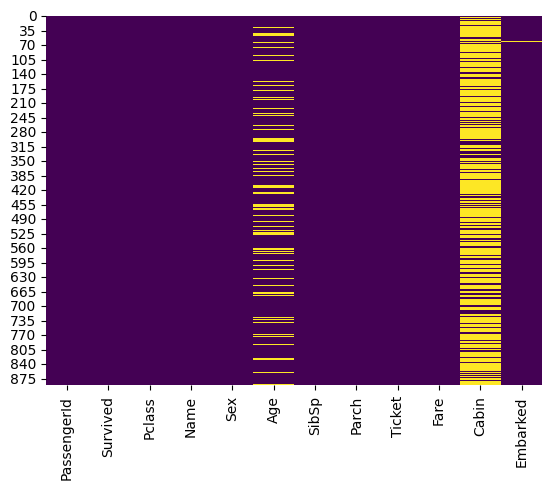

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dtr.isnull(), cbar=False, cmap='viridis')
plt.show()


In [23]:

from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Replace 'parameter_with_strings' and 'binary_parameter' with the actual column names
parameter_with_strings = dtr['Cabin']
binary_parameter = dtr['Survived']

# Convert strings to numerical labels
label_encoder = LabelEncoder()
parameter_with_strings_encoded = label_encoder.fit_transform(parameter_with_strings)

# Calculate the correlation between the numerical label-encoded column and the binary column
correlation_coefficient = pd.Series(parameter_with_strings_encoded).corr(binary_parameter)

print(f"The correlation coefficient between parameter_with_strings and binary_parameter is: {correlation_coefficient}")


The correlation coefficient between parameter_with_strings and binary_parameter is: -0.25488786482849946


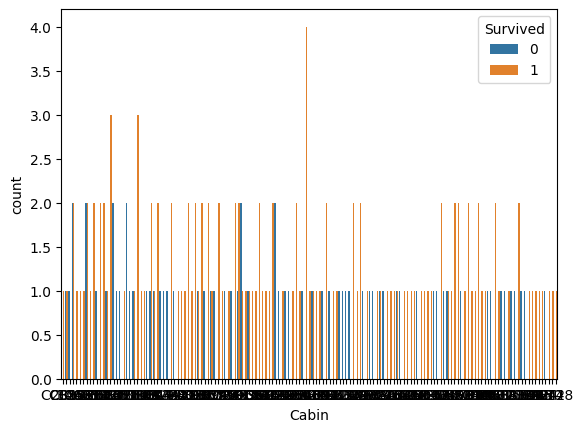

In [24]:
sns.countplot(x=parameter_with_strings, hue=binary_parameter)
plt.show()

In [25]:
# Cabin column is dropped because 77% of the data is missing
dtr=dtr.drop('Cabin',axis=1)
dts=dts.drop('Cabin',axis=1)

In [26]:
print(dtr)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Handling missing values in Age

In [27]:
dtr['Age'].mean()
dts['Age'].mean()

30.272590361445783

In [28]:
dtr['Age'].fillna(dtr['Age'].mean(),inplace=True)
dts['Age'].fillna(dts['Age'].mean(),inplace=True)


In [29]:
print(dts['Age'].isnull().sum())

0


Handling missing values in Embarked

In [30]:
dtr['Embarked'].fillna('S',inplace=True)
dts['Embarked'].fillna('S',inplace=True)

In [31]:
print(dts['Embarked'].unique())

['Q' 'S' 'C']


Making the values continuous in SibSp

In [32]:
dtr['SibSp'].replace(8,6, inplace=True)
dts['SibSp'].replace(8,6, inplace=True)

In [33]:
print(dtr['SibSp'].unique())

[1 0 3 4 2 5 6]


Dropping Name and Ticket

In [34]:
dtr=dtr.drop("Name",axis=1)
dtr=dtr.drop("Ticket",axis=1)
dts=dts.drop("Name",axis=1)
dts=dts.drop("Ticket",axis=1)


In [35]:
print(dtr)

     PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.699118      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000      0      0   7.7500   

    Embarked  
0          S  
1        

Assigning numerical values to Sex and Embarked


In [36]:
sex_mapping = {"male":0, "female":1}
dtr['Sex'] = dtr['Sex'].map(sex_mapping)

dts['Sex'] = dts['Sex'].map(sex_mapping)


embarked_mapping = {"S": 1, "C": 2, "Q": 3}
dtr['Embarked'] = dtr['Embarked'].map(embarked_mapping)

dts['Embarked'] = dts['Embarked'].map(embarked_mapping)

In [37]:
print(dtr)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    0  22.000000      1      0   7.2500   
1              2         1       1    1  38.000000      1      0  71.2833   
2              3         1       3    1  26.000000      0      0   7.9250   
3              4         1       1    1  35.000000      1      0  53.1000   
4              5         0       3    0  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    0  27.000000      0      0  13.0000   
887          888         1       1    1  19.000000      0      0  30.0000   
888          889         0       3    1  29.699118      1      2  23.4500   
889          890         1       1    0  26.000000      0      0  30.0000   
890          891         0       3    0  32.000000      0      0   7.7500   

     Embarked  
0           1  
1           2  
2           1  
3          

In [38]:
print(dtr['Fare'].isnull().sum())

0


Edit null values in Fare

In [39]:
your_parameter= 'Fare'
mean_value = dts[your_parameter].mean()
mean_value1=dtr[your_parameter].mean()
# Replace missing values with the mean
dts[your_parameter].fillna(mean_value, inplace=True)
dtr[your_parameter].fillna(mean_value1, inplace=True)

print(dtr.isnull().any())


PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool


#Model Building And Evaluation

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Drop the Survived and PassengerId
# column from the trainset
predictors = dtr.drop(['Survived', 'PassengerId'], axis=1)
predictors1=dts.drop('PassengerId',axis=1)
target = dtr["Survived"]
target1=result["Survived"]

#x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size=0.2, random_state=0)
x_train=predictors
x_test=predictors1
y_train=target
y_test=target1
print(x_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         3
1         3    1  47.00000      1      0    7.0000         1
2         2    0  62.00000      0      0    9.6875         3
3         3    0  27.00000      0      0    8.6625         1
4         3    1  22.00000      1      1   12.2875         1
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         1
414       1    1  39.00000      0      0  108.9000         2
415       3    0  38.50000      0      0    7.2500         1
416       3    0  30.27259      0      0    8.0500         1
417       3    0  30.27259      1      1   22.3583         2

[418 rows x 7 columns]


Random Forest:


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

randomforest = RandomForestClassifier()

# Fit the training data along with its output
randomforest.fit(x_train,y_train)
y_pred = randomforest.predict(predictors1)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_test,y_pred) * 100, 2)
print("Accuracy:",acc_randomforest)
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:",precision)
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:",recall)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)



Accuracy: 80.86
Precision: 0.7432432432432432
Recall: 0.7236842105263158
F1 Score: 0.7333333333333334


Logistic Regression:


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
acc_logreg = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:",acc_logreg)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:",precision)
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:",recall)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)


Accuracy: 94.74
Precision: 0.922077922077922
Recall: 0.9342105263157895
F1 Score: 0.9281045751633986


Decision Tree:


In [46]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
acc_dectree = round(accuracy_score(y_test,y_pred) * 100, 2)
print("Accuracy:" ,acc_dectree)
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:",precision)
# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:",recall)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)

Accuracy: 78.23
Precision: 0.6967741935483871
Recall: 0.7105263157894737
F1 Score: 0.7035830618892508
